## Logistic Regression for Spam Classification
Import Data from https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data, rename it as 'spambase.csv'.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,SGDClassifier
import matplotlib.pyplot as plt

data_path = 'spambase.csv'
spam = pd.read_csv(data_path,header=None)

## shuffle the data
spam = spam.sample(frac=1).reset_index(drop=True)
spam.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.96,0.00,0.48,0.0,0.00,0.96,0.0,0.00,0.48,0.0,...,0.0,0.818,0.0,0.175,0.467,0.116,9.560,259,717,1
1,0.76,0.00,0.38,0.0,0.12,0.25,0.0,0.12,0.12,0.0,...,0.0,0.022,0.0,0.661,0.088,0.000,2.256,21,325,1
2,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.00,0.51,0.00,0.0,1.02,0.00,0.0,0.51,0.00,0.0,...,0.0,0.071,0.0,0.000,0.000,0.000,2.076,9,108,0
4,0.00,14.28,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.800,5,9,0


#### Generate Training Data and Testing Data
Split 33% for testing data, 66% as training data.

In [2]:
# split feature and label
# spam_feature = spam[np.r_[0:57]]
# spam_label = spam[57]

# 1/3 data for test
test_data = spam[-spam.shape[0]//3:]
test_data_feature = test_data[np.r_[0:57]]
test_data_label = test_data[57]
# 2/3 data for train
train_data = spam[:-spam.shape[0]//3]
train_data_feature = train_data[np.r_[0:57]]
train_data_label = train_data[57]

In [3]:
# use Stochastic Gradient Descent(SGD) to train the model, eta0 is the learning rate
classify_model = SGDClassifier(loss="hinge", penalty="l2",learning_rate='constant',eta0=0.001)
classify_model.fit(train_data_feature,train_data_label)

/Users/PEI/anaconda/envs/tensorflow/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [4]:
predict = classify_model.predict(test_data_feature)

In [5]:
tot,err=0,0
for pred,truth in zip(predict,test_data_label.tolist()):
    if pred!=truth:
        err+=1
    tot+=1
print('Before normalization, testing error rate: {:.2%}'.format(err/tot))

Before normalization, testing error rate: 26.66%


### Test to see how learning rate affect error rate
We do the fixed 1000 iterations, but change the learning rate from 0.001 to 0.1

In [6]:
err_tab=[]
test_rate = [0.0002,0.001,0.005,0.025,0.125,0.725,]
for rate in test_rate:
    classify_model = SGDClassifier(loss="hinge", penalty="l2",learning_rate='constant',eta0=rate,max_iter=1000,tol=None)
    classify_model.fit(train_data_feature,train_data_label)
    predict = classify_model.predict(test_data_feature)
    tot,err=0,0
    for pred,truth in zip(predict,test_data_label.tolist()):
        if pred!=truth:
            err+=1
        tot+=1
    err_tab+=[err/tot]
    print('Before normalization, testing error rate: {:.2%}'.format(err/tot))
   
    
    

Before normalization, testing error rate: 13.30%
Before normalization, testing error rate: 25.55%
Before normalization, testing error rate: 14.93%
Before normalization, testing error rate: 30.57%
Before normalization, testing error rate: 23.01%
Before normalization, testing error rate: 44.85%


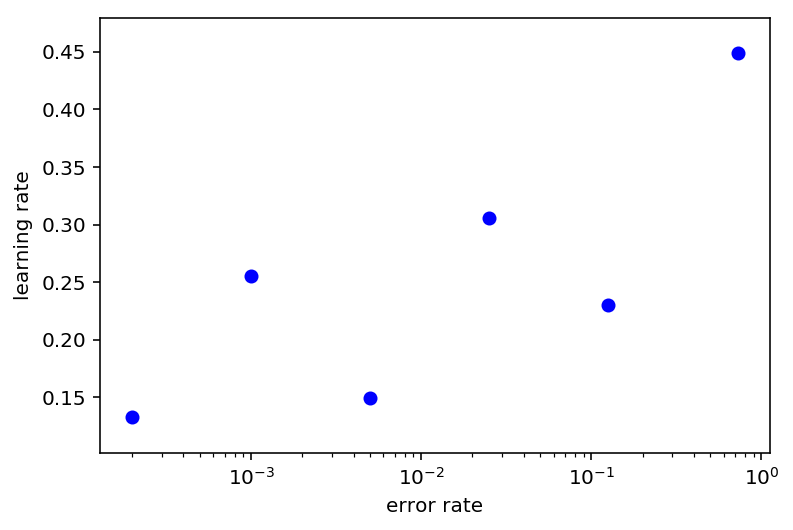

In [7]:
plt.xscale('log')
plt.scatter(test_rate, err_tab, color="blue")
plt.ylabel("learning rate")
plt.xlabel("error rate")

### Normalize the data

In [8]:
feature_index = np.r_[0:57]
scaled_features = {}
for each in feature_index:
    mean, std = spam[each].mean(), spam[each].std()
    scaled_features[each] = [mean, std]
    spam.loc[:, each] = (spam[each] - mean)/std
spam.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,2.801459,-0.165054,0.395411,-0.046894,-0.464264,3.155672,-0.291762,-0.262533,1.399535,-0.371324,...,-0.158436,2.511397,-0.155181,-0.115329,1.590964,0.167144,0.137679,1.061244,0.715284,1
1,2.146489,-0.165054,0.197054,-0.046894,-0.285829,0.562767,-0.291762,0.036666,0.107433,-0.371324,...,-0.158436,-0.432876,-0.155181,0.480499,0.049574,-0.103037,-0.092517,-0.159950,0.068790,1
2,-0.342396,-0.165054,-0.556700,-0.046894,-0.464264,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.158436,-0.514251,-0.155181,-0.329876,-0.308321,-0.103037,-0.132102,-0.262571,-0.458960,0
3,-0.342396,0.230119,-0.556700,-0.046894,1.052436,-0.350228,-0.291762,1.009061,-0.323267,-0.371324,...,-0.158436,-0.251633,-0.155181,-0.329876,-0.308321,-0.103037,-0.098190,-0.221522,-0.289090,0
4,-0.342396,10.899780,-0.556700,-0.046894,-0.464264,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.158436,-0.514251,-0.155181,-0.329876,-0.308321,-0.103037,-0.106889,-0.242047,-0.452363,0


In [9]:
# 1/3 data for test
test_data = spam[-spam.shape[0]//3:]
test_data_feature = test_data[np.r_[0:57]]
test_data_label = test_data[57]
# 2/3 data for train
train_data = spam[:-spam.shape[0]//3]
train_data_feature = train_data[np.r_[0:57]]
train_data_label = train_data[57]

In [10]:
# use Stochastic Gradient Descent(SGD) to train the model
classify_model = SGDClassifier(loss="hinge", penalty="l2",learning_rate='constant',eta0=0.001)
classify_model.fit(train_data_feature,train_data_label)
predict = classify_model.predict(test_data_feature)

tot,err=0,0
for pred,truth in zip(predict,test_data_label.tolist()):
    if pred!=truth:
        err+=1
    tot+=1
print('After normalization, testing error rate: {:.2%}'.format(err/tot))

After normalization, testing error rate: 9.00%


/Users/PEI/anaconda/envs/tensorflow/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


#### As we can find, fit the model with normalized data will produce lower error rate.